In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
from rasterio.mask import mask
from matplotlib.colors import ListedColormap
#from matplotlib_scalebar.scalebar import ScaleBar
from rasterio.plot import plotting_extent

import os

import matplotlib.pyplot as plt

In [ ]:
values_list = [0, 1, 2, 3, 4, 5, 6]
colors_list = ['white', '#006400', '#BBFCAC', '#FFFFB2', '#EA9999', '#aa0000', '#0000FF']
cmap = ListedColormap(colors_list, name='custom_cmap', N=len(colors_list))

In [ ]:
sorting_criterion = lambda e: e["name"]

def importando_imagens(path_diretorio):
    imagens = [];
    for filename in os.listdir(path_diretorio):
        if filename.endswith(".tiff") or filename.endswith(".tif"):
            with rio.open(os.path.join(path_diretorio, filename)) as src:
                imagens.append({"image":src.read(), "name": filename});

    imagens.sort(key = sorting_criterion);
    apenas_imagens = [i["image"] for i in imagens]
    return np.array(apenas_imagens)

In [ ]:
def plotSideBySide(num_x, num_y, imagens):
    fig, axs = plt.subplots(num_x, num_y, figsize = (10,13))

    for i, ax in enumerate(axs.flat):
                ax.imshow(np.squeeze(imagens[i]), cmap = cmap)
                ax.set_title("LULC "+str(i))
                ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
roi = importando_imagens('/content/drive/MyDrive/ILHA_SANTA_CATARINA_ANN_py/imagens')

In [ ]:
dataset = np.expand_dims(roi, axis=0)
dataset = np.transpose(dataset, (0, 1, 3, 4, 2))

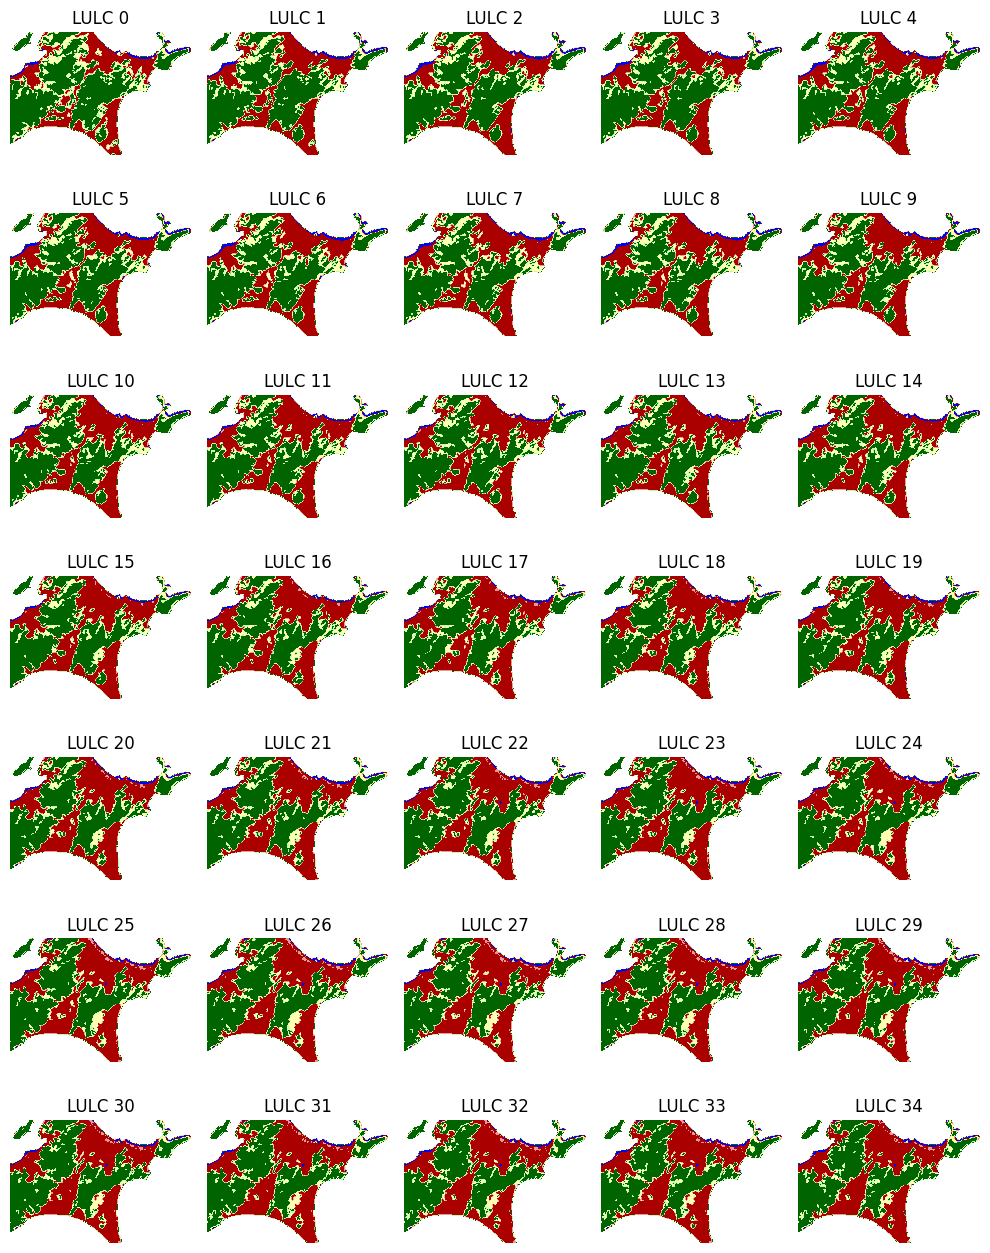

In [ ]:
plotSideBySide(7, 5, dataset[0])

In [ ]:
model = load_model("/content/drive/MyDrive/ILHA_SANTA_CATARINA_ANN_py/model/rede_treinada.h5")

In [ ]:
# Select a random example from the validation dataset.
val_dataset = dataset
example = val_dataset[0]

# Pick the first/last ten frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

In [ ]:
frames = np.expand_dims(frames, axis = 0)
original_frames = np.expand_dims(original_frames, axis = 0)
print(frames.shape)
print(original_frames.shape)

(1, 10, 216, 319, 1)
(1, 26, 216, 319, 1)


1/1 [==============================] - 14s 14s/step
(1, 10, 216, 319, 1)


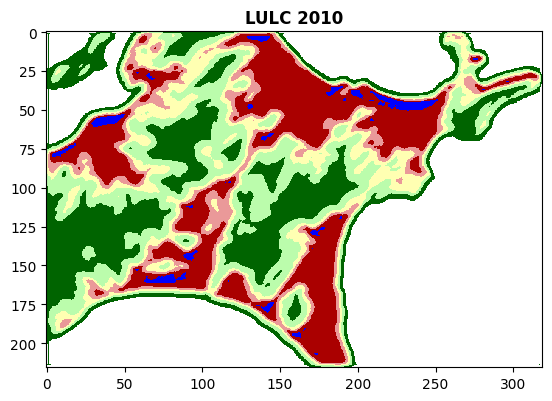

1/1 [==============================] - 15s 15s/step
(1, 11, 216, 319, 1)


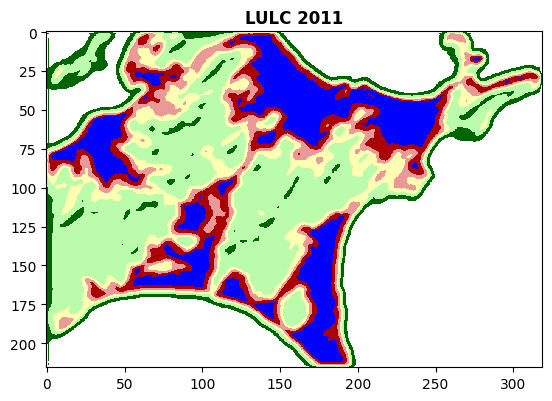

1/1 [==============================] - 16s 16s/step
(1, 12, 216, 319, 1)


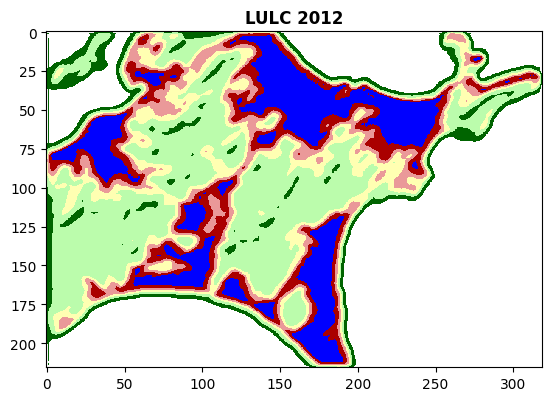

1/1 [==============================] - 16s 16s/step
(1, 13, 216, 319, 1)


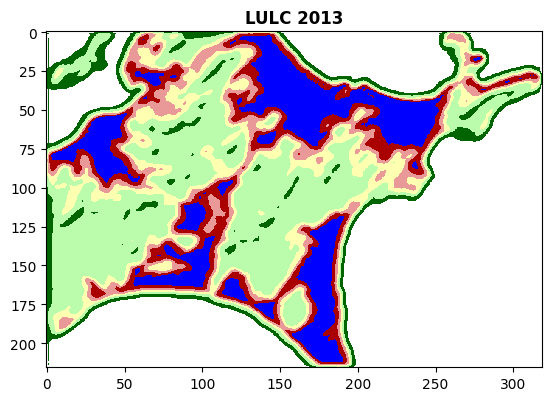

1/1 [==============================] - 25s 25s/step
(1, 14, 216, 319, 1)


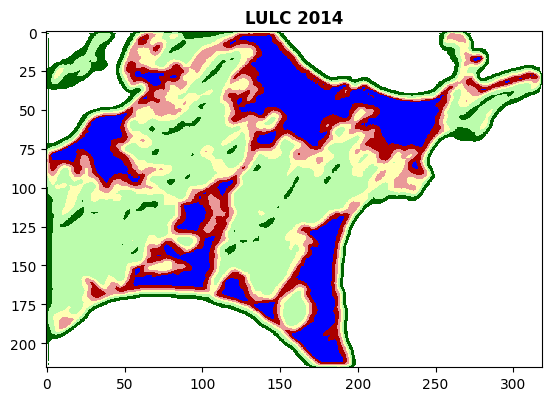

In [ ]:
for i in range(5):
  nova_predicao = model.predict(frames)
  print(nova_predicao.shape)
  predicted_frame  = nova_predicao[0][9]
  show(predicted_frame, cmap = cmap, title = "LULC "+str(i+2010))
  predicted_frame  = np.expand_dims(predicted_frame, axis= 0)   #para concatenar é necessário ter dimensões iguais
  predicted_frame  = np.expand_dims(predicted_frame, axis= 0)   #aplicando a transformação (x,y,c) --> (1, 1, x, y, c)
  frames = np.concatenate((frames, predicted_frame), axis = 1)

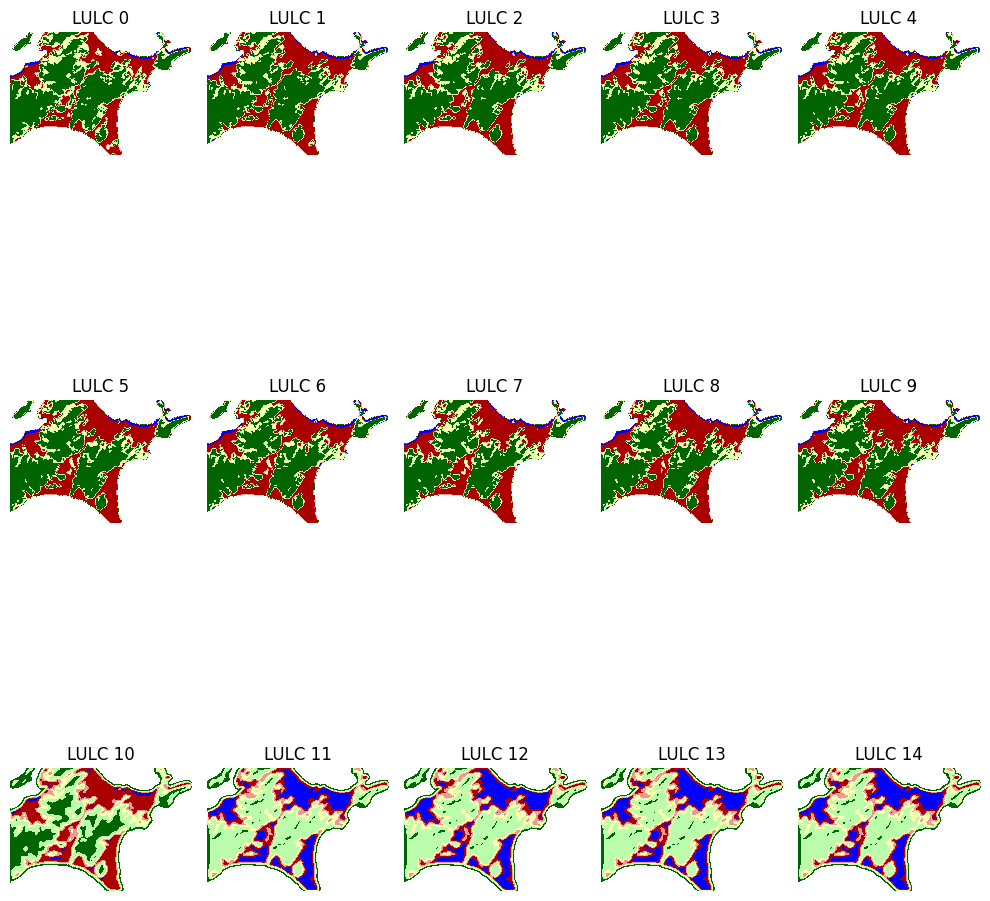

In [ ]:
plotSideBySide(3, 5, frames[0])

In [ ]:
def plotSideBySide(num_x, num_y, imagens):
    fig, axs = plt.subplots(num_x, num_y, figsize = (10,13))

    for i, ax in enumerate(axs.flat):
                ax.imshow(np.squeeze(imagens[i]), cmap = cmap)
                ax.set_title("LULC "+str(i))
                ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
img = [frames[0][10], dataset[0][25]]


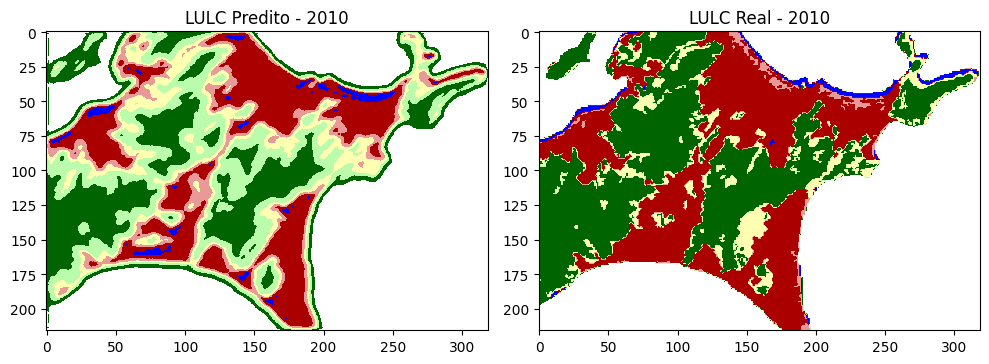

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10,13))
axs[0].imshow(img[0],cmap =cmap)
axs[0].set_title("LULC Predito - 2010")
axs[1].imshow(img[1], cmap =cmap)
axs[1].set_title("LULC Real - 2010")
plt.tight_layout()
plt.show()
